<h3 align="center"> Исследования к курсовой работе А. Ф. Квасова</h3>
*<h1 align="center"> "Байесовский подход к обучению распознаванию образов с учетом критерия гладкости решающего правила на основе метода опорных векторов "</h1>*
<h3 align="center"> Научный руководитель О. В. Красоткина </h3>

##0. Подключение необходимых библиотек.

#### Использование внешних библиотек:

In [1]:
import numpy as np
import numpy.ma as ma
from scipy import linalg, stats
import time

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from sympy import pprint, MatrixSymbol, Matrix, Identity
from IPython.display import display #for sympy

#### Использование пользовательских модулей:

*Автоимпортирование модулей в ядро при их изменении*

In [2]:
%load_ext autoreload
%autoreload 1
%aimport sigproc
%aimport svm
%aimport config_svm

SyntaxError: Missing parentheses in call to 'print' (svm.py, line 234)

*Функции для изменения локальных пораметров форматирования вывода numpy.array объектов*ь

In [ ]:
change_printopt = config_svm.printoptions

In [ ]:
pic_dir = config_svm.pic_dir

In [ ]:
import sys
Eps =  config_svm.Eps #sys.float_info.epsilon

## 1. Предварительное исследование  вида матрицы гладкости, вектора параметров. Визуализация формул (через SYMPY).

In [3]:
from sympy import symbols, var, latex, Eq
from sympy.abc import x, theta, alpha
from sympy import init_printing
def sym_prON():
    init_printing(use_latex='mathjax', fontsize='5pt', use_unicode=True, wrap_line=False, no_global=True)
def sym_prOFF():
    init_printing(pretty_print=False)

In [4]:
B_sym = MatrixSymbol('B', 3, 3)
Eq(B_sym, MatrixSymbol('I', 3, 3) + symbols('alpha')*MatrixSymbol('Btilde', 3, 3))

B == alpha*Btilde + I

In [82]:
Eq(MatrixSymbol('B_inv', 3, 3), B_sym.I)

B_inv == B^-1

###1.1. Визуализируем матрицу гладкости

In [26]:
n = 10
B_diags = np.ones((3, n))
B_diags[1]= 2*np.ones((n,))
B_diags[1, 0] = 1
B_diags[1,-1] = 1
B_diags[0] = -1
B_diags[2] = -1
B_tilde = svm.tridiagonal(B_diags[0, :-1], B_diags[1], B_diags[2, : -1])

alpha=100
B_diags = alpha*B_diags
B_diags[1] += 1

B_inv = linalg.solve_banded((1, 1), B_diags, np.eye(n))

In [27]:
pprint(Matrix(B_inv).evalf(prec=3), wrap_line=False)

⎡0.126   0.118    0.11   0.104   0.0983  0.0939  0.0904  0.0878  0.0861  0.0853⎤
⎢                                                                              ⎥
⎢0.118   0.119   0.111   0.105   0.0993  0.0948  0.0913  0.0887  0.087   0.0861⎥
⎢                                                                              ⎥
⎢ 0.11   0.111   0.114   0.107   0.101   0.0967  0.0931  0.0905  0.0887  0.0878⎥
⎢                                                                              ⎥
⎢0.104   0.105   0.107    0.11   0.104   0.0996  0.0959  0.0931  0.0913  0.0904⎥
⎢                                                                              ⎥
⎢0.0983  0.0993  0.101   0.104   0.108   0.103   0.0996  0.0967  0.0948  0.0939⎥
⎢                                                                              ⎥
⎢0.0939  0.0948  0.0967  0.0996  0.103   0.108   0.104   0.101   0.0993  0.0983⎥
⎢                                                                              ⎥
⎢0.0904  0.0913  0.0931  0.0

In [28]:
n = 10
B_diags = np.ones((3, n))
B_diags[1]= 2*np.ones((n,))
B_diags[1, 0] = 1
B_diags[1,-1] = 1
B_diags[0] = -1
B_diags[2] = -1
B_tilde = svm.tridiagonal(B_diags[0, :-1], B_diags[1], B_diags[2, : -1])

alpha=1
B_diags = alpha*B_diags
B_diags[1] += 1

B_inv = linalg.solve_banded((1, 1), B_diags, np.eye(n))

In [29]:
pprint(Matrix(B_inv).evalf(prec=3), wrap_line=False)

⎡ 0.618     0.236     0.0902   0.0344   0.0132   0.00503  0.00192  0.000739  0.000296  0.000148⎤
⎢                                                                                              ⎥
⎢ 0.236     0.472      0.18    0.0689   0.0263   0.0101   0.00384  0.00148   0.000591  0.000296⎥
⎢                                                                                              ⎥
⎢ 0.0902     0.18     0.451     0.172   0.0658   0.0251   0.00961   0.0037   0.00148   0.000739⎥
⎢                                                                                              ⎥
⎢ 0.0344    0.0689    0.172     0.448    0.171   0.0653    0.025   0.00961   0.00384   0.00192 ⎥
⎢                                                                                              ⎥
⎢ 0.0132    0.0263    0.0658    0.171    0.447    0.171   0.0653    0.0251    0.0101   0.00503 ⎥
⎢                                                                                              ⎥
⎢0.00503    0.0101    0.0251  

In [11]:
n = 1000
B_diags = np.ones((3, n))
B_diags[1]= 2*np.ones((n,))
B_diags[1, 0] = 1
B_diags[1,-1] = 1
B_diags[0] = -1
B_diags[2] = -1
B_tilde = svm.tridiagonal(B_diags[0, :-1], B_diags[1], B_diags[2, : -1])

alpha=100
B_diags = alpha*B_diags
B_diags[1] += 1

B_inv = linalg.solve_banded((1, 1), B_diags, np.eye(n))

In [12]:
pprint(Matrix(B_inv[n/2 - 3:n/2 + 3, n/2 - 3:n/2 + 3]).evalf(prec=8), wrap_line=False)

⎡0.049937617  0.045187305  0.040888866  0.036999316  0.033479759  0.030294999⎤
⎢                                                                            ⎥
⎢0.045187305  0.049937617  0.045187305  0.040888866  0.036999316  0.033479759⎥
⎢                                                                            ⎥
⎢0.040888866  0.045187305  0.049937617  0.045187305  0.040888866  0.036999316⎥
⎢                                                                            ⎥
⎢0.036999316  0.040888866  0.045187305  0.049937617  0.045187305  0.040888866⎥
⎢                                                                            ⎥
⎢0.033479759  0.036999316  0.040888866  0.045187305  0.049937617  0.045187305⎥
⎢                                                                            ⎥
⎣0.030294999  0.033479759  0.036999316  0.040888866  0.045187305  0.049937617⎦


In [21]:
n = 5
B_diags = np.ones((3, n))
B_diags[1]= 2*np.ones((n,))
B_diags[1, 0] = 1
B_diags[1,-1] = 1
B_diags[0] = -1
B_diags[2] = -1
B_tilde = svm.tridiagonal(B_diags[0, :-1], B_diags[1], B_diags[2, : -1])

alpha=100
B_diags = alpha*B_diags
B_diags[1] += 1

B_inv = linalg.solve_banded((1, 1), B_diags, np.eye(n))

In [54]:
display(MatrixSymbol('B = ', n, n))
display(Matrix(symbols('alpha')*B_tilde.astype('int') + Identity(n)), num_columns=2, wrap_line=False)
display(MatrixSymbol('B_inv^{\prime}\,    =', n, n))
display(Matrix(linalg.triu(B_inv)).evalf(prec=5), wrap_line=False)

B = 

⎡α + 1    -α        0        0       0  ⎤
⎢                                       ⎥
⎢ -α    2⋅α + 1    -α        0       0  ⎥
⎢                                       ⎥
⎢  0      -α     2⋅α + 1    -α       0  ⎥
⎢                                       ⎥
⎢  0       0       -α     2⋅α + 1   -α  ⎥
⎢                                       ⎥
⎣  0       0        0       -α     α + 1⎦

B_inv__{\prime}\,    =

⎡0.21174  0.20386  0.19802  0.19415  0.19223⎤
⎢                                           ⎥
⎢   0     0.2059     0.2    0.19609  0.19415⎥
⎢                                           ⎥
⎢   0        0     0.20398    0.2    0.19802⎥
⎢                                           ⎥
⎢   0        0        0     0.2059   0.20386⎥
⎢                                           ⎥
⎣   0        0        0        0     0.21174⎦

## Визуализация пространства векторов параметров, сгенерированных с помощью нормального распределения с нулевым средним и матрицей ковариации $B^{-1}$

In [55]:
init_printing(pretty_print=False)

In [56]:
import seaborn as sns
sns.set_style('ticks')
sns.despine(offset=10, trim=True);

In [230]:
def vis_w10(alpha=1):
    n = 10
    B_diags = np.ones((3, n))
    B_diags[1]= 2*np.ones((n,))
    B_diags[1, 0] = 1
    B_diags[1,-1] = 1
    B_diags[0] = -1
    B_diags[2] = -1
    B_tilde = svm.tridiagonal(B_diags[0, :-1], B_diags[1], B_diags[2, : -1])

    B_diags = alpha*B_diags
    B_diags[1] += 1

    B_inv = linalg.solve_banded((1, 1), B_diags, np.eye(n))
    
    samples = stats.multivariate_normal.rvs(cov=B_inv, size=500)
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(23, 23))
    plt.subplots_adjust(hspace=0.7, wspace=0.2)
    cnt = 0
    refer = 0
    width = max(abs(samples.min()), abs(samples.max()))
    colors = mpl.cm.rainbow(np.linspace(0, 1, n))
    for i in range(0, samples.shape[1]):
        if refer == i: continue
        ax[cnt//3, cnt%3].scatter(samples[:,i], samples[:,refer],c=colors[i], alpha=0.8)
        ax[cnt//3, cnt%3].set_title(u'Проекция на две координаты \n' +str(refer + 1) + u' и ' +str(i + 1), fontsize=20)
        ax[cnt//3, cnt%3].set_xlabel('Координата №%d \n$Cov_{%d%d} = %.3f$\n $Cov_{%d%d} = %.3f \
                                            $\n$Cov_{%d%d} = Cov_{%d%d} = %.3f$' % (i + 1, refer + 1, refer + 1, B_inv[refer,refer],
                                                                                    i + 1, i + 1, B_inv[i,i],
                                                                                    refer + 1, i + 1, i + 1, refer + 1, 
                                                                                    B_inv[i,refer]), fontsize=20)
        ax[cnt//3, cnt%3].set_ylabel('Координата №' + str(refer + 1), fontsize=20)
        ax[cnt//3, cnt%3].set_xlim((-width, width))
        ax[cnt//3, cnt%3].set_ylim((-width, width))
        cnt += 1

    plt.suptitle(u'Визуализация двух координат случайнs реализаций \n в пространстве векторов параметров модели c ковариационной матрицей $Cov = B^{-1}$ \n'+ r'$\alpha = $' + str(alpha), fontsize=30)
    plt.savefig(pic_dir + 'vis_twice10_alpha' + str(alpha)+ '.png',dpi=150, bbox_inches='tight')
    plt.show()

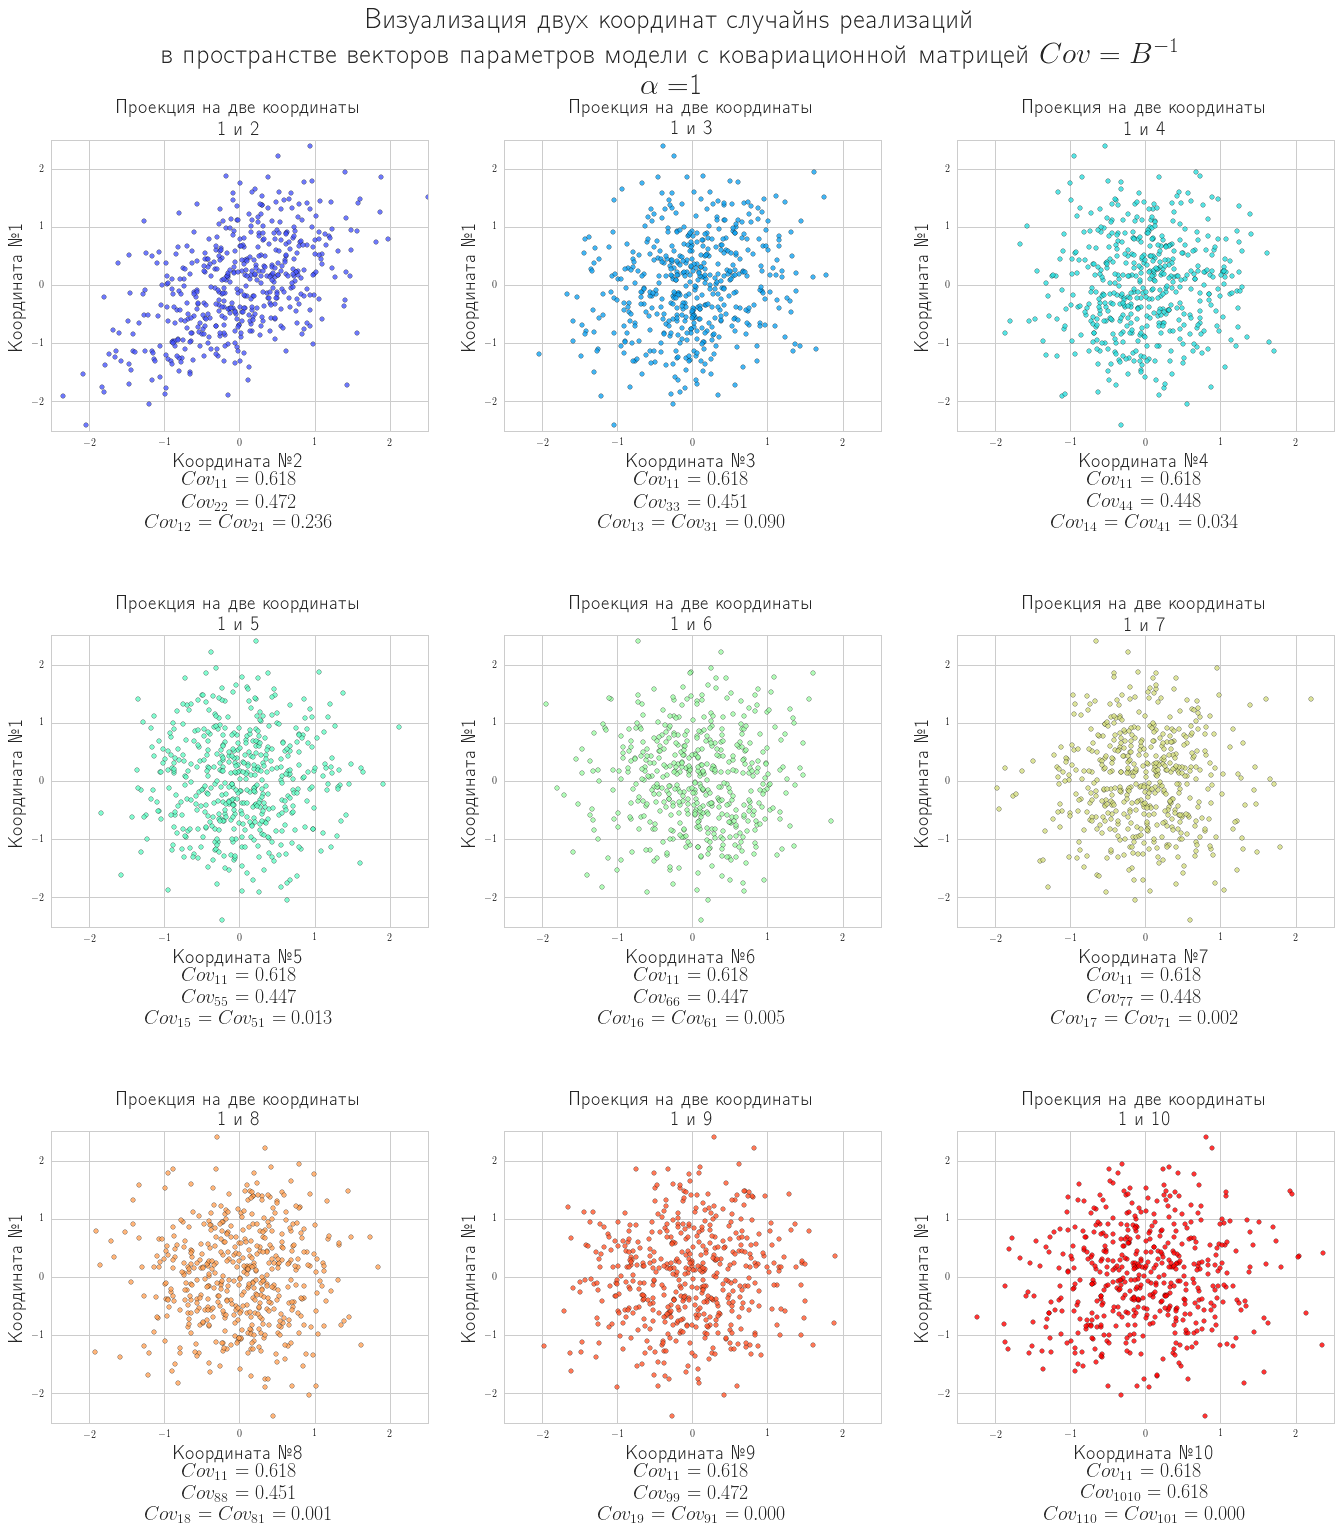

In [231]:
vis_w10()

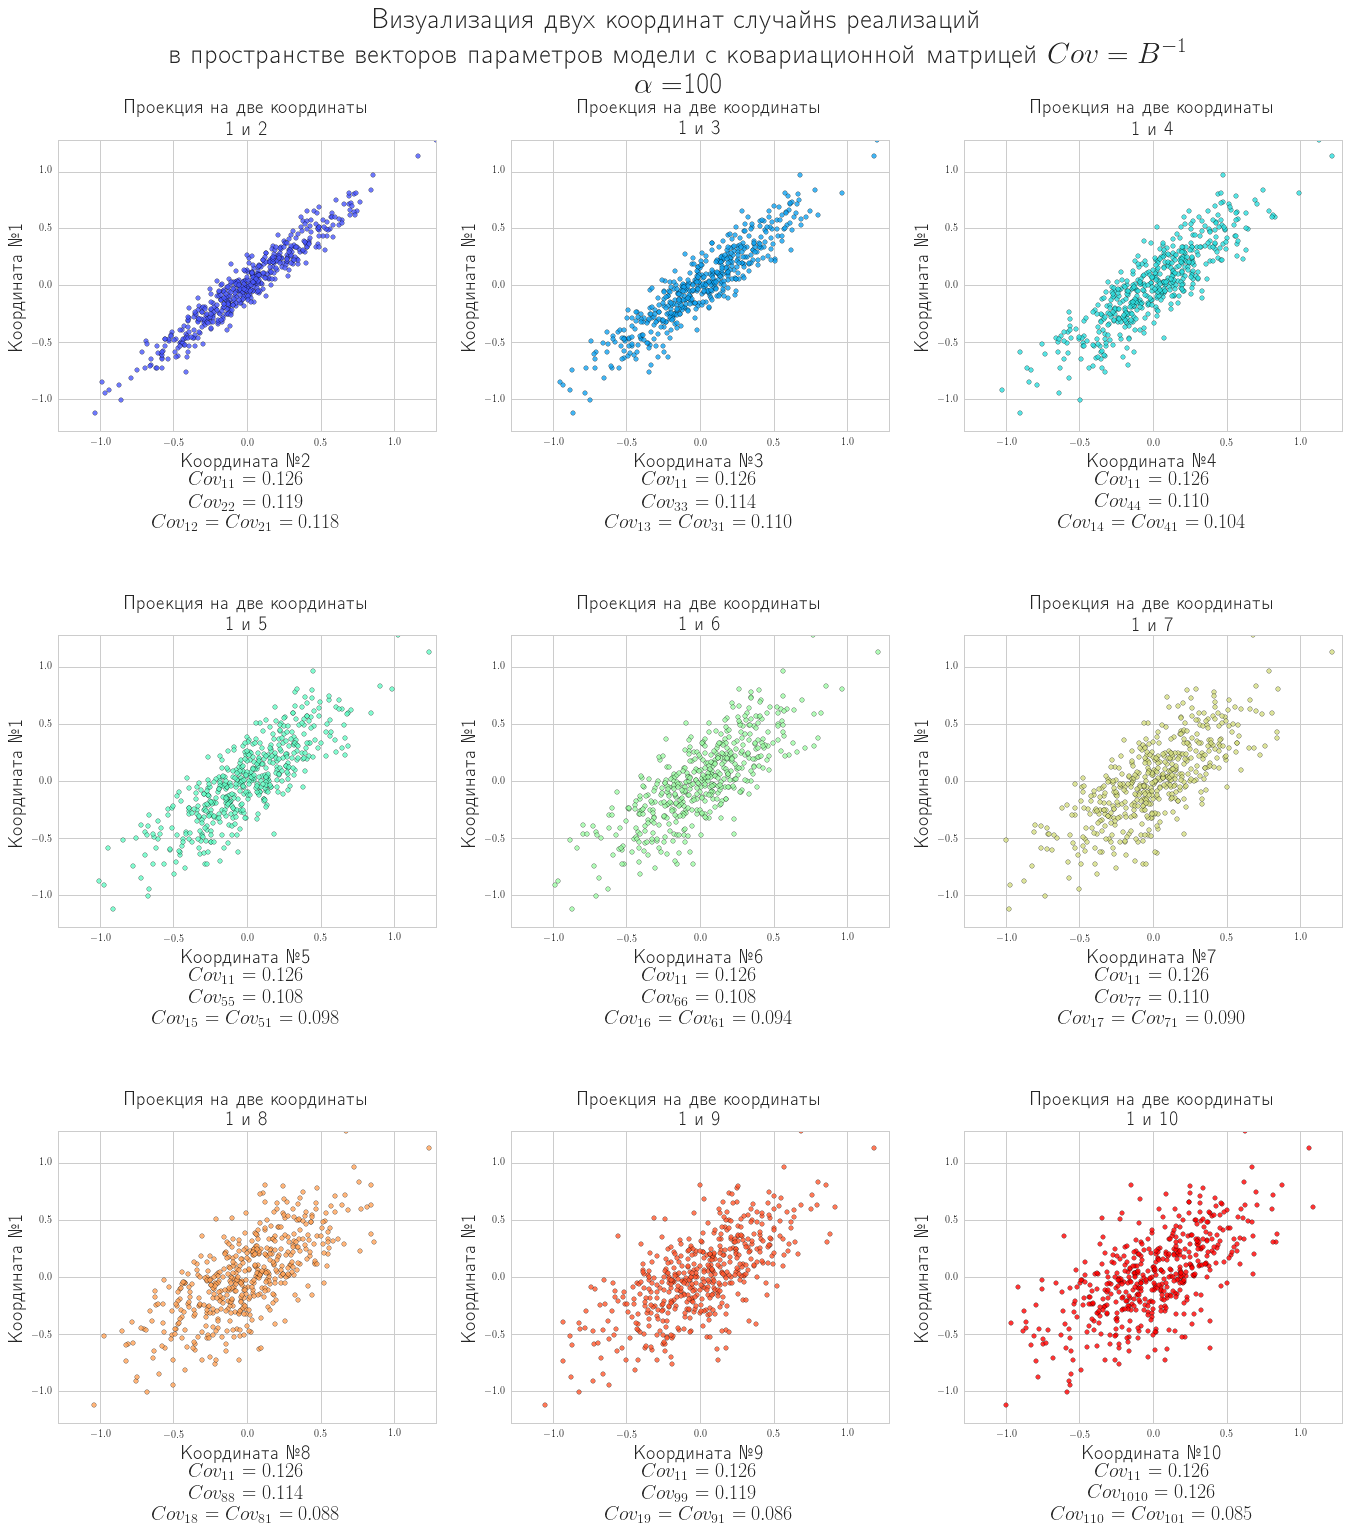

In [232]:
vis_w10(alpha=100)

In [233]:
def vis_w5(alpha=1):
    n = 5
    B_diags = np.ones((3, n))
    B_diags[1]= 2*np.ones((n,))
    B_diags[1, 0] = 1
    B_diags[1,-1] = 1
    B_diags[0] = -1
    B_diags[2] = -1
    B_tilde = svm.tridiagonal(B_diags[0, :-1], B_diags[1], B_diags[2, : -1])

    B_diags = alpha*B_diags
    B_diags[1] += 1

    B_inv = linalg.solve_banded((1, 1), B_diags, np.eye(n))
    samples = stats.multivariate_normal.rvs(cov=B_inv, size=500)
    fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
    cnt = 0
    col = mpl.cm.rainbow(np.linspace(0, 1, n))
    #col = ['b', 'g', 'r', 'y', 'c']
    width = max(abs(samples.min()), abs(samples.max()))
    for i in range(samples.shape[1]):
        for j in range(samples.shape[1]):
            if i == j: continue
            ax[cnt//4, cnt%4].scatter(samples[:,j], samples[:,i],c=col[j], alpha=0.5)
            ax[cnt//4, cnt%4].set_title(u'Проекция на две координаты \n' +str(i) + u' и ' +str(j), fontsize=20)
            ax[cnt//4, cnt%4].set_xlabel('Координата №%d \n$Cov_{%d%d} = %.3f$\n $Cov_{%d%d} = %.3f \
                                            $\n$Cov_{%d%d} = Cov_{%d%d} = %.3f$' % (j + 1, i + 1, i + 1, B_inv[i,i],
                                                                                    j + 1, j + 1, B_inv[j,j],
                                                                                    i + 1, j + 1, j + 1, i + 1, 
                                                                                    B_inv[j,i]), fontsize=15)
            ax[cnt//4, cnt%4].set_xlim((-width, width))
            ax[cnt//4, cnt%4].set_ylim((-width, width))
            ax[cnt//4, cnt%4].set_ylabel('Координата №' + str(i + 1), fontsize=15)

            cnt += 1

    plt.suptitle(u'Визуализация двух координат случайнs реализаций \n в пространстве векторов параметров модели c ковариационной матрицей $Cov = B^{-1}$ \n'+ r'$\alpha = $' + str(alpha), fontsize=30)
    plt.subplots_adjust(hspace=0.7, wspace=0.2)
    plt.savefig(pic_dir + "vis_twice5_alpha" + str(alpha) + ".png",dpi=150, bbox_inches='tight')
    plt.show()

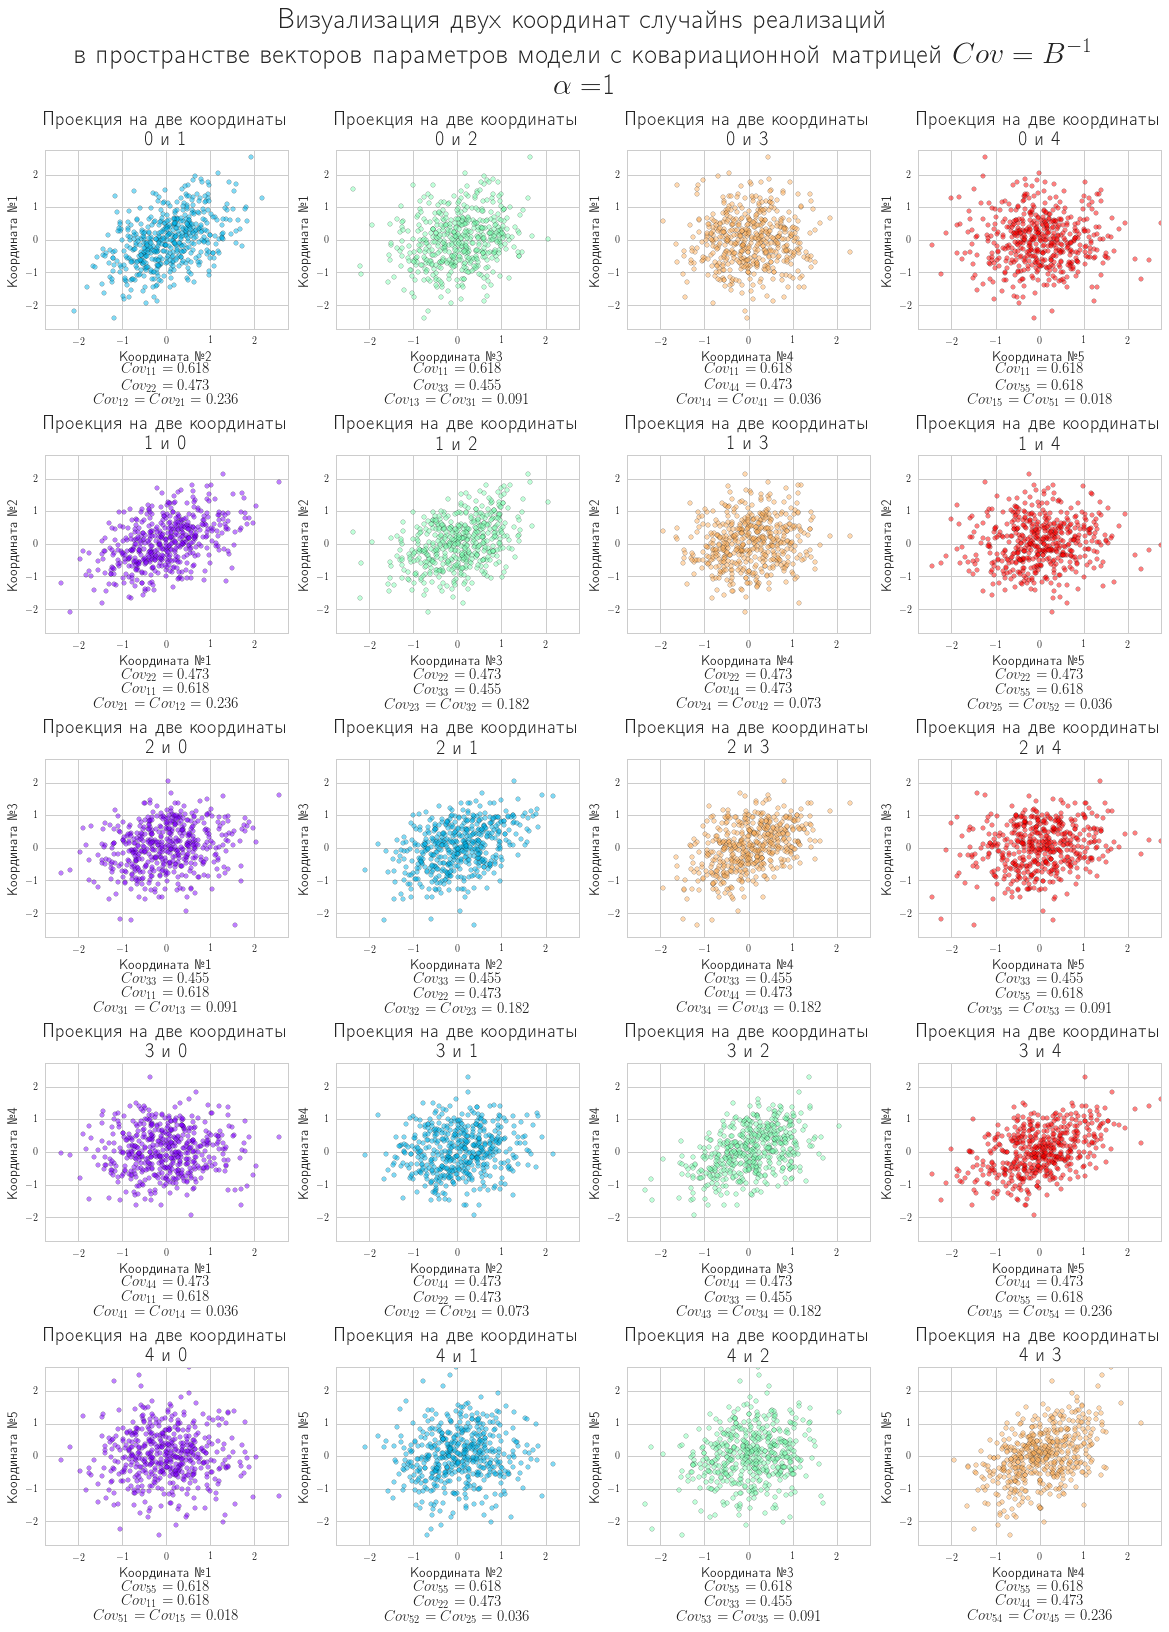

In [234]:
vis_w5()

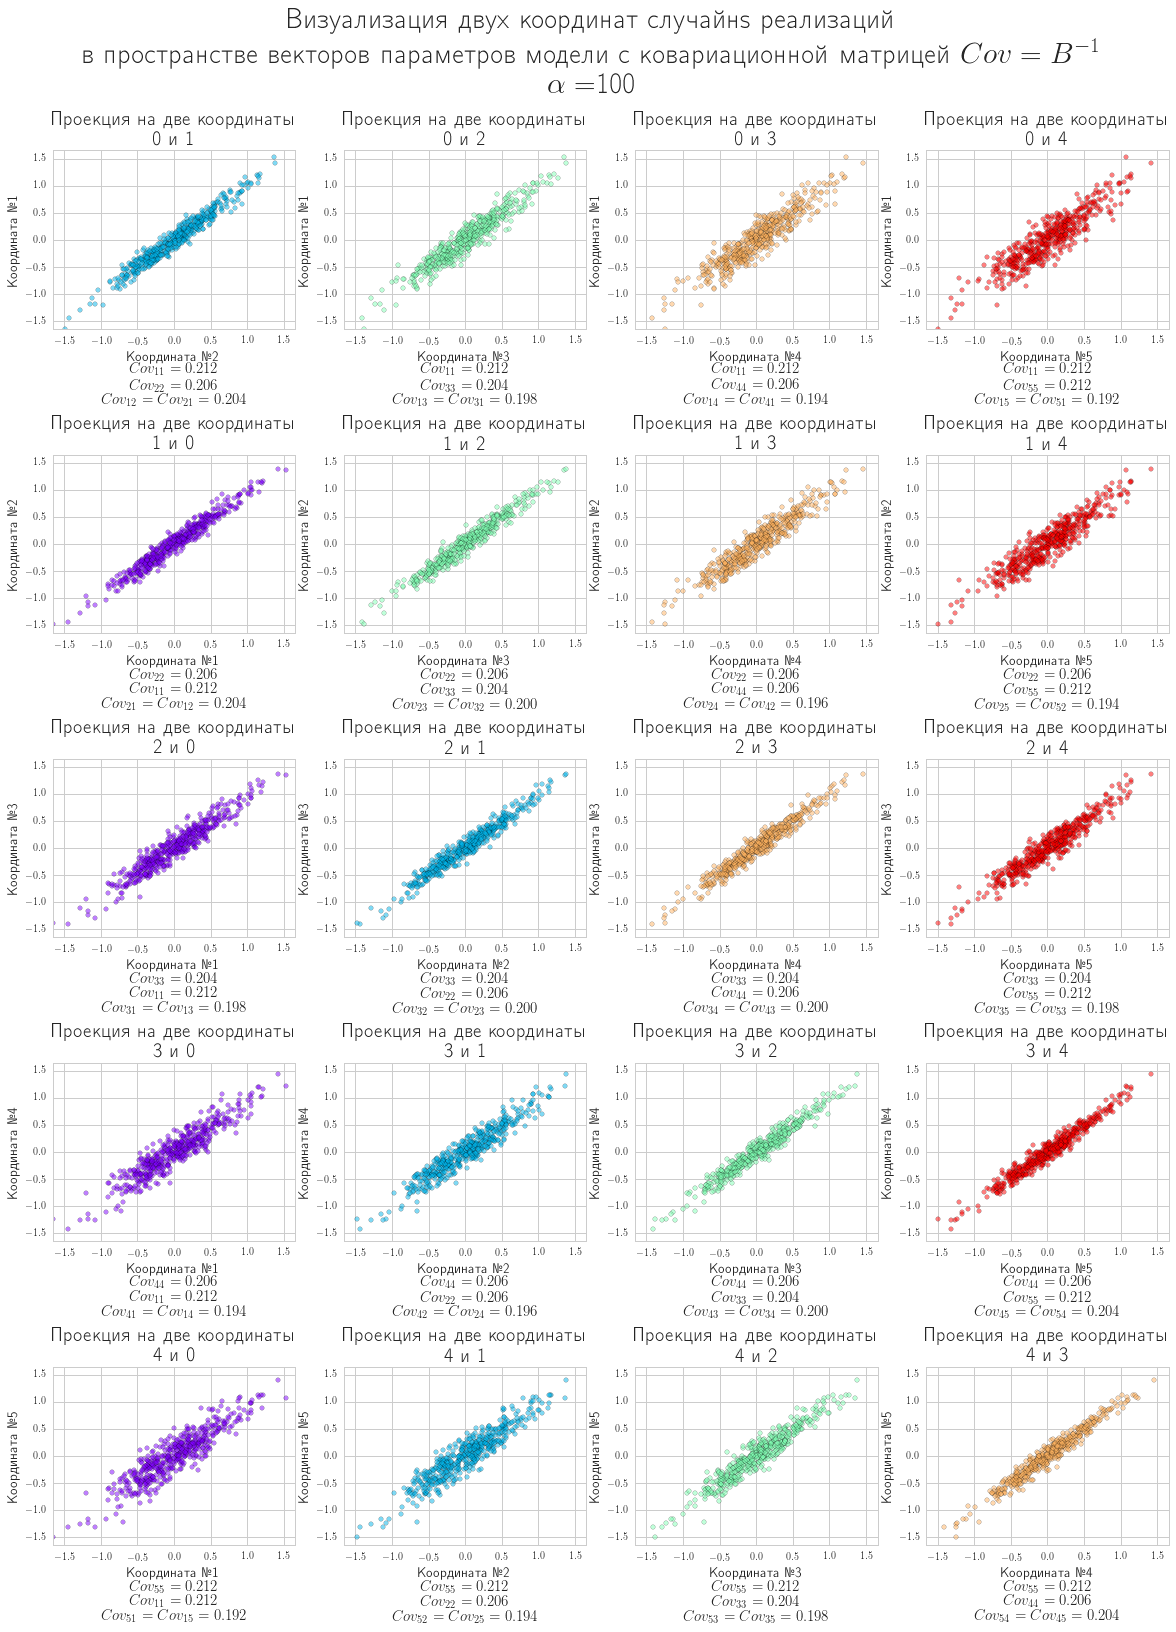

In [235]:
vis_w5(alpha=100)

## 2. Обучение на модельных данных

##2.1. Эксперименты на модельных данных

In [83]:
import seaborn as sns
sns.set_style('whitegrid')

In [84]:
sym_prOFF()

### Средняя длинна признакового описания объекта (взято из UJI Pen Characters Data Set)

In [7]:
dataset_pars = []
data_dir = 'data/uji-penchars/ver1/'

import re
from os import walk

for i in range(1, 12):#11 writer's handwriting in 11 files
    data_file = open((data_dir + 'UJIpenchars-w{:02d}').format(i))
    two_numbers = re.compile('\s*(\d+)\s+(\d+)\s*')
    segment = re.compile('^.SEGMENT*')
    num = 0
    feat_num = []
    for line in data_file.read().splitlines():
        seg_m = segment.match(line)
        if seg_m:
            if num:
                feat_num += [num] 
            num = 0
        tn_m = two_numbers.match(line)
        if tn_m:
            num += 2
            #print(m.group(1), m.group(2))
    dataset_pars += [np.mean(feat_num)]

In [9]:
dataset_pars

[91.77235772357723,
 96.617886178861795,
 118.91056910569105,
 98.40650406504065,
 80.162601626016254,
 94.243902439024396,
 122.09756097560975,
 169.54471544715446,
 104.66666666666667,
 96.975609756097555,
 129.34959349593495]

###2.1.1. Генерация модельных данных

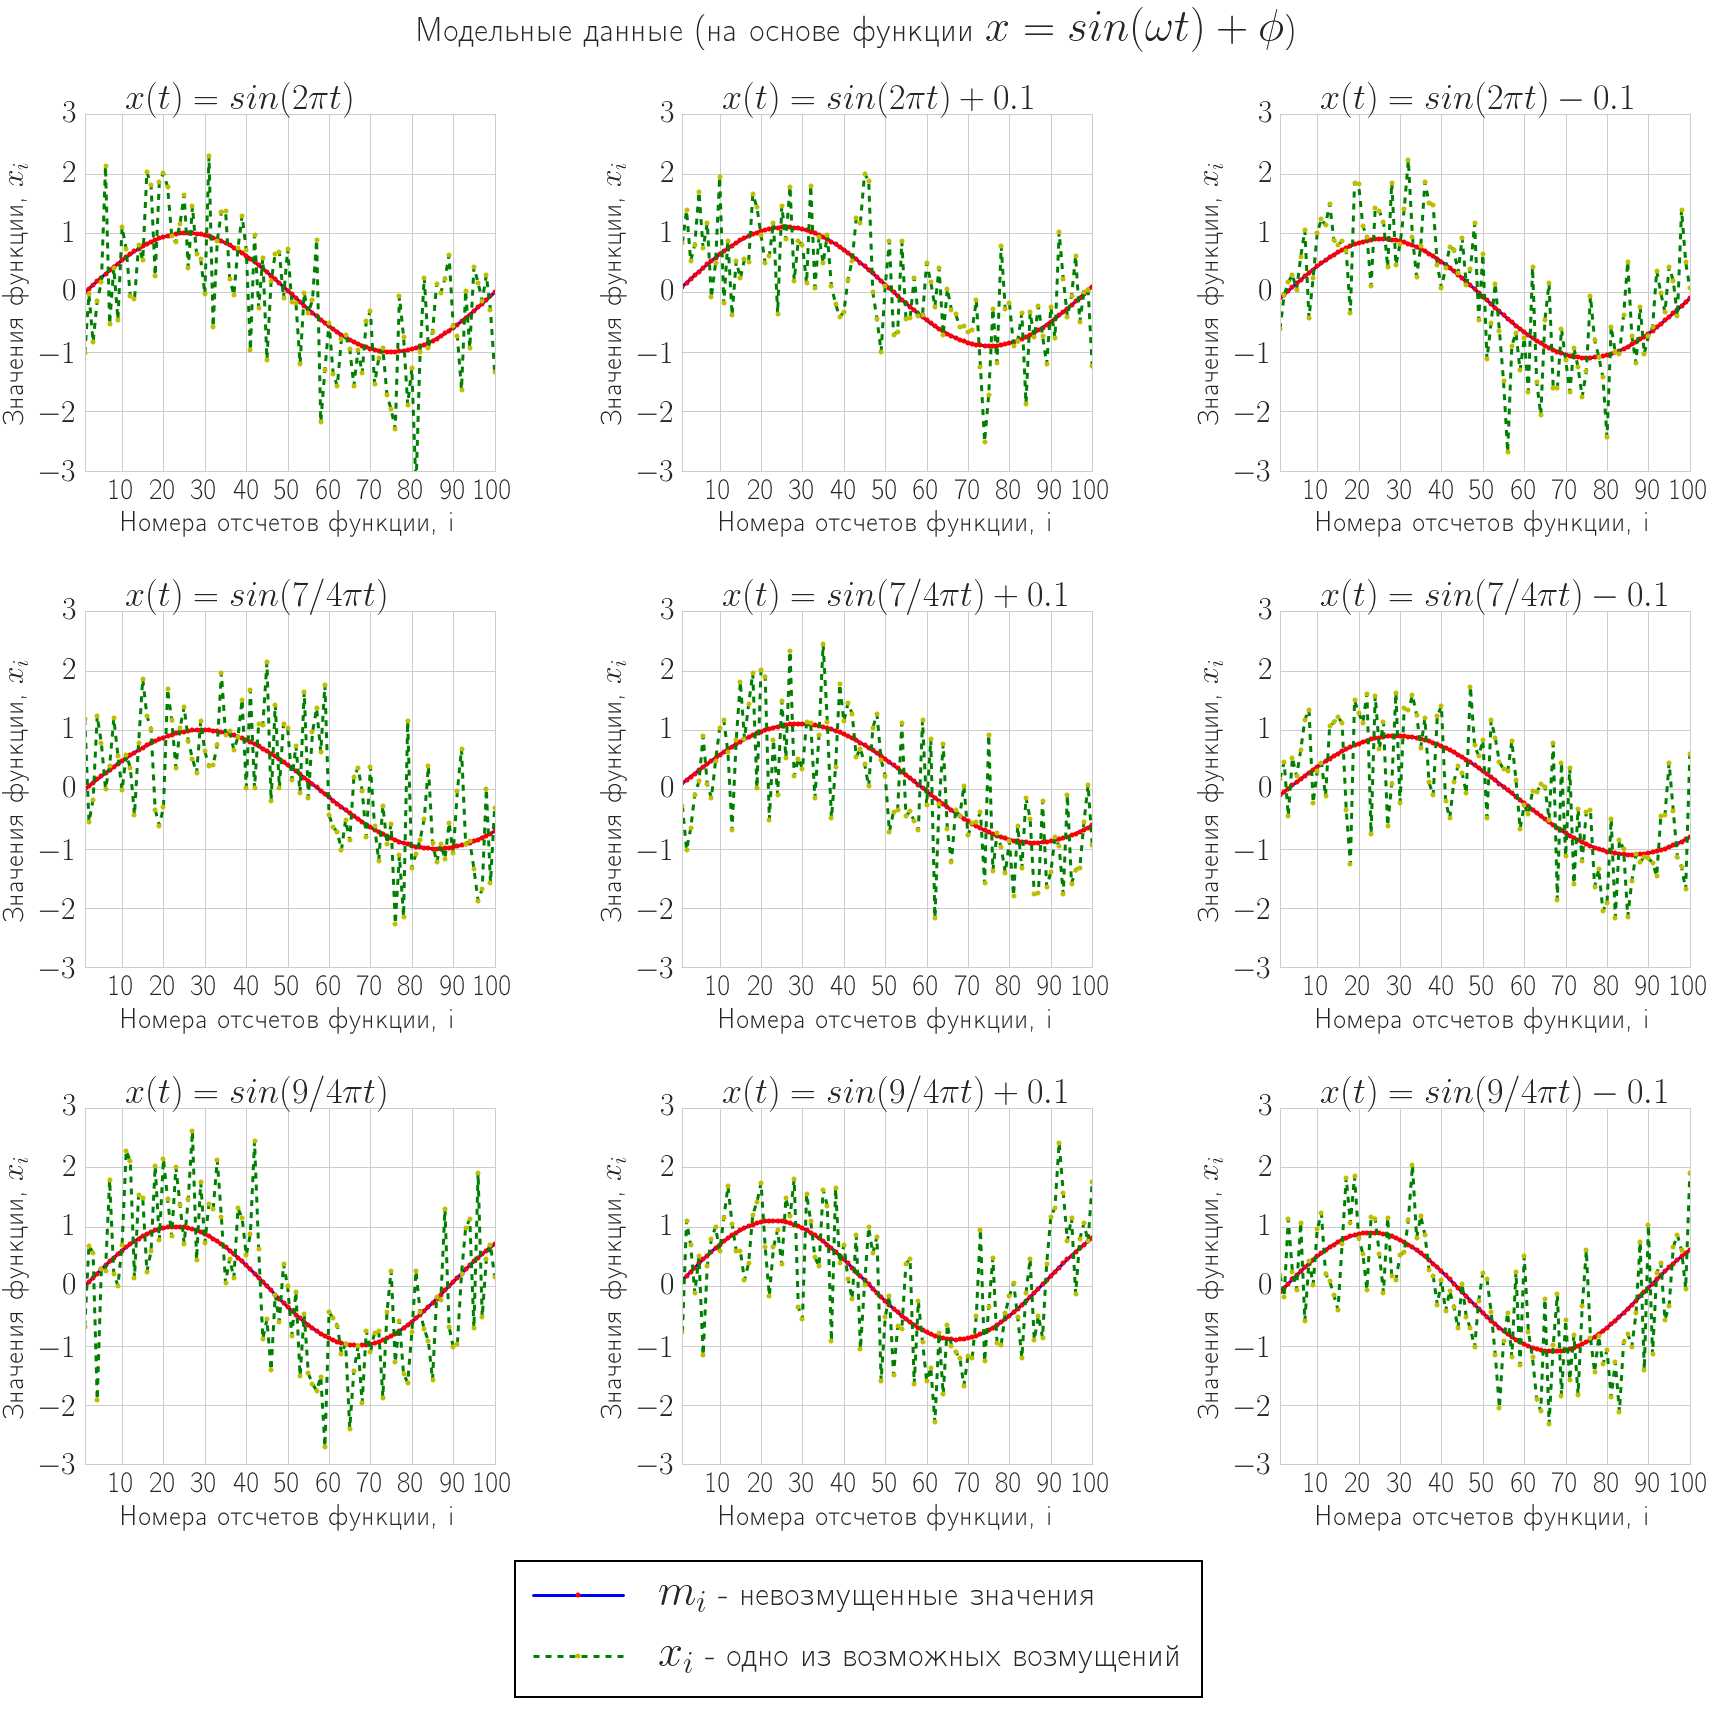

In [14]:
D = 100 #100/2 = aver.feat.num/2 - Количество отсчетов - признаков в пространстве сигналов
t = np.linspace(0, 1, D, dtype='float64')

## Зададим вручную матрицу K
#  - количество классов: по строкам - изменение частот функций;
#                        по столбцам - изменение фаз функций
# Всего 3*3=9 классов

freqs = [2*np.pi, 7/4*np.pi, 9/4*np.pi]#6/4*np.pi
fr_names = ['2', '7/4', '9/4']
shifts = [0     , 0.1      , -0.1] #Сдвиги вверх-вниз
sh_names = ['', '+0.1', '- 0.1']
#phases = [0, 5/6*np.pi, np.pi/3]

K = np.empty((len(freqs), len(shifts)), dtype='O') #len(phases), 
for i in range(K.shape[0]):
    for j in range(K.shape[1]):
        #for k in range(K.shape[2]):
            #K[i, j, k] = (freqs[i], shifts[j], phases[k])
            K[i, j] = (freqs[i], shifts[j])
            
# K = [[(2*np.pi, 0), (5/4*np.pi, 0), (10/12*np.pi, 0)],
#      [(2*np.pi, 5/6 * np.pi), (5/4*np.pi, 5/6*np.pi), (10/12*np.pi, 5/6*np.pi)],
#      [(2*np.pi, np.pi/3), (5/4*np.pi, np.pi/3), (10/12*np.pi, np.pi/3)]]

# выборка в матрице dataX, ответы в datay
N_max = D*10 # max количество объектов на обучении == количеству на контроле
N_cl = N_max# N_max//2 - для обучения + N_max//2 - для контроля
#по 25 объектов на класс,
#        по 50 объектов в выборке из двух классов - MAX:
#                    нужно 12+13=25 или 15+10=25 объектов в выбоке
dataX = np.empty((N_cl*K.size, D), dtype='float64')
datay = np.empty((N_cl*K.size, 1), dtype='float64')

def_fontsize = config_svm.rcParams['font.size']
fig = plt.figure(figsize=(25, 25))
cnt = 0

phi = 0
disp = 0.5
axis_size = (K.shape[0], K.shape[1])
for i in range(axis_size[0]):
    for j in range(axis_size[1]):
        cnt += 1
        ax = fig.add_subplot(axis_size[0], axis_size[1], cnt)
        w, sh = K[i, j]
        line1, = ax.plot(t, np.sin(w*t + phi) + sh, 'bo-', lw=3, markersize=5, markerfacecolor='r', label='meanX')
        dataX[(cnt-1)*N_cl: cnt*N_cl, :]  =  stats.multivariate_normal.rvs(                 #Генерация объектов из многомерного
                                                                                  #нормального распределения
                                        mean=np.sin(w*t + phi) + sh,  #со средним из выбранных 25 
                                        cov=disp*np.eye(D), size=N_cl)                 #отсчетов sin(a*t + b)
                                                                                  #дисперсией 0.25, чтобы в результате
                                                                                  #большинство значения не выходили за [-2, 2]
        datay[(cnt-1)*N_cl: cnt*N_cl, 0] = cnt - 1
        line2, = ax.plot(t, dataX[(cnt-1)*N_cl, :], 'go--', lw=3, markersize=5, markerfacecolor='y', label='dataX')
        plt.xticks(t[D//10 - 1::D//10], np.arange(D//10, D + 1)[::D//10], fontsize=def_fontsize*0.7)
        plt.yticks(fontsize=def_fontsize*0.7)
        plt.ylim(-3, 3)
        ax.set_xlabel(u'Номера отсчетов функции, i', fontsize=def_fontsize*0.7)
        ax.set_ylabel(u'Значения функции, $x_i$', fontsize=def_fontsize*0.7)
        #ax.set_ylabel(r'$sin(\omega_{0:} t + \varphi_{1:})$'.format(i, j), fontsize=def_fontsize*0.8) -- is rotated == bad((
        ax.text(0.1,  3 + 0.1,'$x(t) = sin(%s \pi t) %s$'  % (fr_names[i], sh_names[j]), fontsize=def_fontsize*0.8)
lgd = fig.legend([line1, line2], ['$m_i$ - невозмущенные значения', '$x_i$ - одно из возможных возмущений'], loc=8,
                 fontsize=def_fontsize, frameon=True) #borderaxespad=0.01)
                #bbox_to_anchor=(0.4, -0.01))#, mode='expand')#, )
lgd.get_frame().set_edgecolor('k')
lgd.get_frame().set_linewidth(2)
fig.tight_layout(h_pad=2., w_pad=2.)
fig.subplots_adjust(top=0.9, bottom=0.15)
title = fig.suptitle(u'Модельные данные (на основе функции $x = sin(\omega t ) + \phi$)', y=0.96)
#fig.savefig(pic_dir + 'model_data_view.png', dpi=150, bbox_inches='tight', frameon=True, bbox_extra_artists=(lgd,title))
plt.show()

###2.1.2. Визализация данных в спрямляющем пространстве

In [38]:
n = dataX.shape[1]
B_diags = np.ones((3, n))
B_diags[1]= 2*np.ones((n,))
B_diags[1, 0] = 1
B_diags[1,-1] = 1
B_diags[0] = -1
B_diags[2] = -1
B_tilde = svm.tridiagonal(B_diags[0, :-1], B_diags[1], B_diags[2, : -1])

alpha=100
B_diags = alpha*B_diags #make regularity coeff
B_diags[1] += 1 # Plus I matrix

B_inv = linalg.solve_banded((1, 1), B_diags, np.eye(n))
B_inv12 = linalg.sqrtm(B_inv)

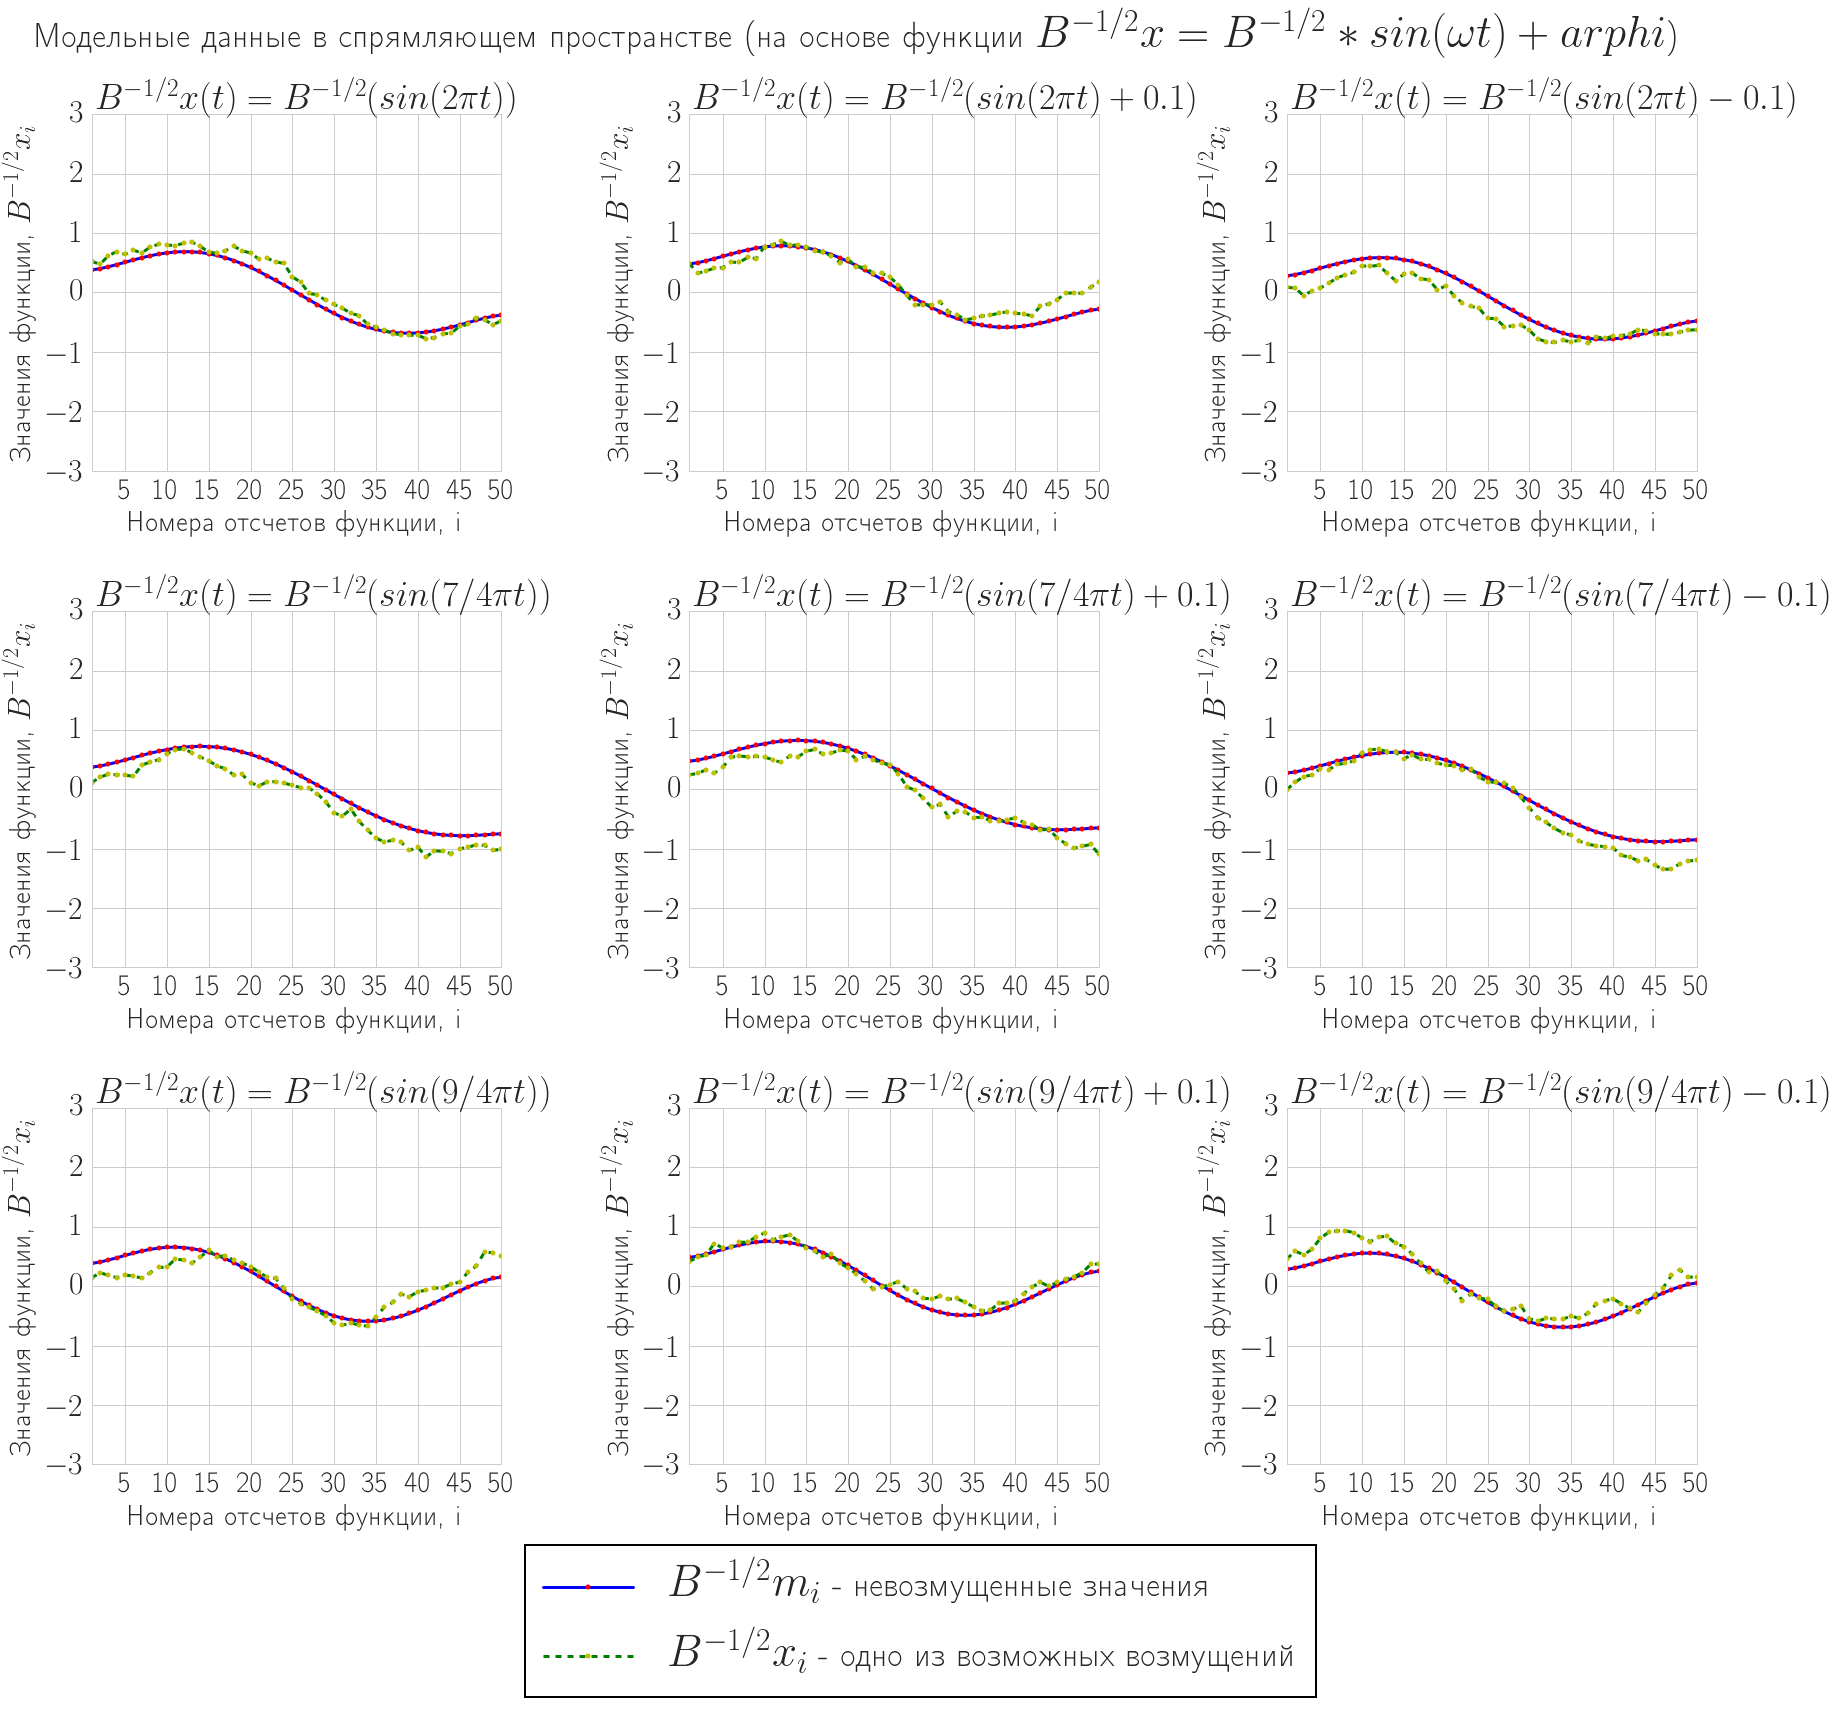

In [39]:
fig = plt.figure(figsize=(25, 25))
cnt = 0

phi = 0
disp = 0.5
axis_size = (K.shape[0], K.shape[1])
for i in range(axis_size[0]):
    for j in range(axis_size[1]):
        cnt += 1
        ax = fig.add_subplot(axis_size[0], axis_size[1], cnt)
        w, sh = K[i, j]
        line1, = ax.plot(t, np.dot(B_inv12, np.sin(w*t + phi) + sh), 'bo-', lw=3, markersize=5, markerfacecolor='r', label='meanX')
        line2, = ax.plot(t, np.dot(B_inv12, dataX[(cnt-1)*N_cl, :]), 'go--', lw=3, markersize=5, markerfacecolor='y', label='dataX')
        plt.xticks(t[D//10 - 1::D//10], np.arange(D//10, D + 1)[::D//10], fontsize=def_fontsize*0.7)
        plt.yticks(fontsize=def_fontsize*0.7)
        plt.ylim(-3, 3)
        ax.set_xlabel(u'Номера отсчетов функции, i', fontsize=def_fontsize*0.7)
        ax.set_ylabel(u'Значения функции, $B^{-1/2}x_i$', fontsize=def_fontsize*0.7)
        #ax.set_ylabel(r'$sin(\omega_{0:} t + \varphi_{1:})$'.format(i, j), fontsize=def_fontsize*0.8) -- is rotated == bad((
        ax.text(0.01,  3 + 0.1,'$B^{-1/2}x(t) = B^{-1/2}(sin(%s \pi t) %s)$'  % (fr_names[i], sh_names[j]), fontsize=def_fontsize*0.8)
lgd = fig.legend([line1, line2], ['$B^{-1/2}m_i$ - невозмущенные значения', '$B^{-1/2}x_i$ - одно из возможных возмущений'], loc=8,
                 fontsize=def_fontsize, frameon=True) #borderaxespad=0.01)
                #bbox_to_anchor=(0.4, -0.01))#, mode='expand')#, )
lgd.get_frame().set_edgecolor('k')
lgd.get_frame().set_linewidth(2)
fig.tight_layout(h_pad=2., w_pad=2.)
fig.subplots_adjust(top=0.9, bottom=0.15)
title = fig.suptitle(u'Модельные данные в спрямляющем пространстве (на основе функции $B^{-1/2}x = B^{-1/2}*sin(\omega t) + \varphi$)', y=0.96)
fig.savefig(pic_dir + 'H_model_data_view.png', dpi=150, bbox_inches='tight', frameon=True, bbox_extra_artists=(lgd,title))
plt.show()

<h3>2.1.2 Процесс измерения точности (Hold-out CV)</h3> 
<h4>на случайном разделении выборки на контроль и обучение *(каждый класс из 100 объектов в равном соотношении 75:25)*</h4>

In [156]:
n_al=1000
step = 10
b_size=64/8
n_space = 6
t_al = 40
print((9*8/2)*(100)*(n_al/step)*(n_space) * (b_size)/10**9, 'Gb')
print(t_al*(n_al/step)*(n_space) / 3600, 'hours')

len(N_expers)*len(N_expers[2])*(N_expers[2][2].itemsize*36)*100/(2**20)

0.01728 Gb
6.666666666666667 hours


15.106201171875

In [35]:
tm = time.time()
exp0 = hold_out_modelhw(dataX, datay, K, N_max, alpha=0, N_train=dataX.shape[1], n_boarder='N_train', exper_iters=100)
tm = time.time() - tm

In [33]:
tm

33.29797649383545

In [34]:
pprint(Matrix(exp0).evalf(prec=5))

⎡0  0.4279  0.3379  0.0758  0.0432  0.0518  0.026   0.0272  0.0354⎤
⎢                                                                 ⎥
⎢0    0     0.1835  0.0876  0.0631  0.0379  0.0101  0.017   0.0043⎥
⎢                                                                 ⎥
⎢0    0       0     0.0443  0.0116  0.0631  0.0335  0.0237  0.0274⎥
⎢                                                                 ⎥
⎢0    0       0       0     0.3601  0.3775  0.0002  0.0002    0   ⎥
⎢                                                                 ⎥
⎢0    0       0       0       0     0.1905    0       0       0   ⎥
⎢                                                                 ⎥
⎢0    0       0       0       0       0       0       0       0   ⎥
⎢                                                                 ⎥
⎢0    0       0       0       0       0       0     0.3638  0.4238⎥
⎢                                                                 ⎥
⎢0    0       0       0       0       0       0 

In [210]:
import sys

def modify(func):
    return sys.modules[func.__module__]

modify(hold_out_modelhw)

<module '__main__'>

In [213]:
import time

D = dataX.shape[1]    
N_space = [D//2, D, D+50, D+100, D+250]#[, D+400]#
alpha_space = list(range(0, 10))
alpha_space += list(range(10, 1001, 10))
alpha_space = np.array(alpha_space)
N_expers = []
tmstmps = []
for N_train in N_space:
    tms = []
    expers = []
    for alpha in alpha_space:
        tm = time.time()
        exper = sigproc.hold_out_modelhw(dataX, datay, K, N_max, alpha=alpha, N_train=N_train,
                                 n_boarder='N_train',exper_iters=100)
        tm = time.time() - tm
        tms += [tm]
        expers += [exper]
    N_expers += [expers]
    tmstmps += [tms]

In [233]:
N_expers_full = N_expers

In [234]:
np.sum(tmstmps) /(3600)

12.4915919612

In [215]:
%store N_expers_full

Stored 'N_expers_full' (list)


In [187]:
%store N_expers

Stored 'N_expers' (list)


In [188]:
%store tmstmps

Stored 'tmstmps' (list)


In [180]:
pprint(Matrix(N_expers[3][len(alpha_space)//2]).evalf(prec=6))

⎡0  0.27045  0.22555  0.021   0.01325  0.01825  0.0068    0.006   0.0059 ⎤
⎢                                                                        ⎥
⎢0     0     0.0957   0.0248  0.01335  0.0146   0.0102    0.009   0.00285⎥
⎢                                                                        ⎥
⎢0     0        0     0.0131  0.00915  0.0247   0.01015  0.01055  0.0061 ⎥
⎢                                                                        ⎥
⎢0     0        0       0     0.22945  0.2543   0.0002   0.00055  0.0001 ⎥
⎢                                                                        ⎥
⎢0     0        0       0        0     0.09475     0        0        0   ⎥
⎢                                                                        ⎥
⎢0     0        0       0        0        0     0.0022    0.006   0.00045⎥
⎢                                                                        ⎥
⎢0     0        0       0        0        0        0     0.2147   0.2712 ⎥
⎢                        

### MAKE:
    average exper
    variance exper
        #aver = np.zeros((K.size, K.size), dtype='float64')
        #var = np.zeros_like(aver)
        #for i in range(K.size - 1):
        #    aver[i, i+1:] = np.mean(res_sum[i], axis=-1)
        #    var[i, i+1:] = 
    accur_for_alpha
        #accur_cl = [np.sum(exper)/np.sum(exper > Eps) for exper in expers]
    
    MayBe:: try n_boarder='N_max'??

In [171]:
bi_class = (K.size-1)*K.size / 2
N_accur = [[np.sum(ex_al)/bi_class for ex_al in ex_als] for ex_als in N_expers]

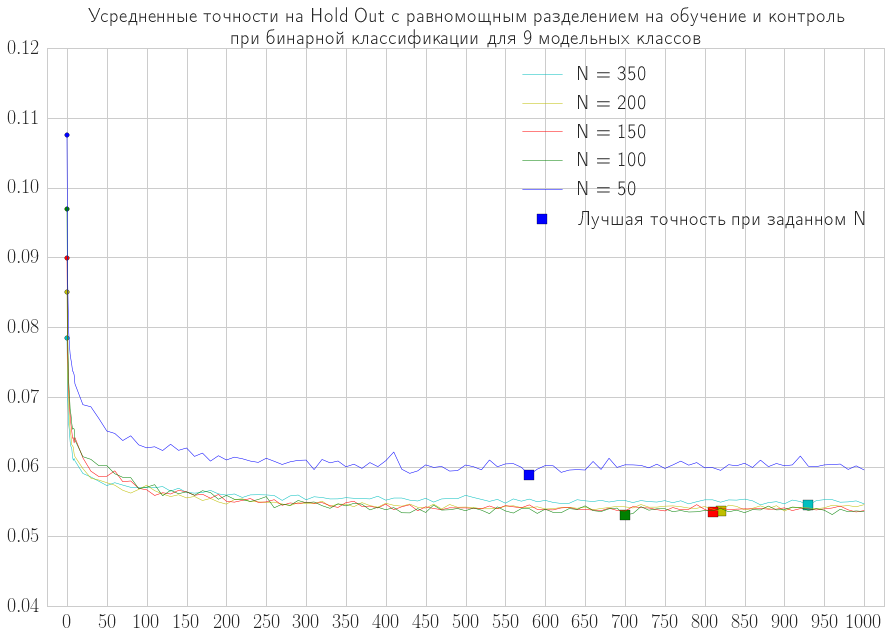

In [201]:
fig = plt.figure(figsize=(15, 10))
#col = str(mpl.cm.rainbow(np.linspace(0, 1, len(N_expers))))
col = ['b', 'g', 'r', 'y', 'c']
lab = N_space
lines = []
l = len(N_expers)
n_lines = ['N = ' + str(lab[N]) for N in range(l-1, -1, -1)]
for N in range(l - 1, -1, -1):
    mini = np.argmin(N_accur[N])
    lines += plt.plot(alpha_space, N_accur[N], col[N],label='N = ' + str(lab[N]), lw=0.5)# marker='o', 
    plt.scatter(0, N_accur[N][0], c=col[N])
    scat = plt.scatter(alpha_space[mini], N_accur[N][mini], marker='s', c=col[N], s=110,
                       label='Лучшая точность при заданном N')

plt.xticks(np.arange(0, alpha_space[-1] + 5, 50), fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-25, alpha_space.max() + 25)
plt.legend(lines + [scat], n_lines + ['Лучшая точность при заданном N'], loc=1, fontsize=20)
plt.title(u'Усредненные точности на Hold Out с равномощным разделением на обучение и контроль\n при бинарной классификации для 9 модельных классов', fontsize=20)
#fig.savefig(pic_dir + 'score.png', dpi=150, bbox_inches='tight', frameon=True, bbox_extra_artists=(lgd,title))
plt.show()

####Проверка на стабильное улучшение бинарной классификации для каждой пары классов

In [183]:
pprint(Matrix(N_expers[N][4]).evalf(prec=6),  wrap_line=False)

⎡0  0.4178  0.233   0.021   0.0264  0.048   0.0122  0.0256  0.021 ⎤
⎢                                                                 ⎥
⎢0    0     0.1286  0.0452  0.0218   0.07   0.0102  0.0108  0.0004⎥
⎢                                                                 ⎥
⎢0    0       0     0.0342  0.0082  0.0524   0.01   0.0014  0.0152⎥
⎢                                                                 ⎥
⎢0    0       0       0     0.372   0.2972    0       0       0   ⎥
⎢                                                                 ⎥
⎢0    0       0       0       0     0.1684    0       0       0   ⎥
⎢                                                                 ⎥
⎢0    0       0       0       0       0       0       0       0   ⎥
⎢                                                                 ⎥
⎢0    0       0       0       0       0       0     0.2554  0.345 ⎥
⎢                                                                 ⎥
⎢0    0       0       0       0       0       0 

In [181]:
for N in range(len(N_space)):
    print(('При попарной бинарной классификации 9 классов с %d-мерным признаковым пространством для выборок'
            +'из %d объектов в обучении и контроле,'
            +'точность при наилучшем alpha уменьшилась: ') % (D, N_space[N]), end=' ')
    print(str(np.sum(N_expers[N][np.argmax(N_accur[N])] - N_expers[N][0] < -Eps))
          + ' из ' + str((81 - 9)//2) + ' попарных классификаций объектов;')
    print()

При попарной бинарной классификации 9 классов с 50-мерным признаковым пространством для выборокиз 25 объектов в обучении и контроле,точность при наилучшем alpha уменьшилась:  6 из 36 попарных классификаций объектов;

При попарной бинарной классификации 9 классов с 50-мерным признаковым пространством для выборокиз 50 объектов в обучении и контроле,точность при наилучшем alpha уменьшилась:  2 из 36 попарных классификаций объектов;

При попарной бинарной классификации 9 классов с 50-мерным признаковым пространством для выборокиз 100 объектов в обучении и контроле,точность при наилучшем alpha уменьшилась:  1 из 36 попарных классификаций объектов;

При попарной бинарной классификации 9 классов с 50-мерным признаковым пространством для выборокиз 150 объектов в обучении и контроле,точность при наилучшем alpha уменьшилась:  2 из 36 попарных классификаций объектов;

При попарной бинарной классификации 9 классов с 50-мерным признаковым пространством для выборокиз 300 объектов в обучении и контро

In [301]:
def loo_modelhw(dataX, datay, K, N_max, alpha=1, N_train = dataX.shape[1]):
    N_train_cl = N_train // 2 # D = 25, 50 ?? Сколько берем объектов одного класса для эксперимента
    N_test_cl = N_train_cl
    
    res_sum = []
    #par_sum = []
    for i in range(K.size):
        res = []
        #param = []
        for j in range(i+1, K.size):
            results = 0
            ind = np.random.choice(N_max, size=N_train_cl, replace=False).tolist()
            ind += np.random.choice(N_max, size=N_train_cl, replace=False).tolist()
            for x_ind in range(2*N_train_cl):
                num1 = i #Номер первого класса
                num2 = j #Номер второго класса
                #Сделаем обучающую выборку
                
                ind_tr = np.array(ind[:x_ind] + ind[x_ind+1:])
                ind_tr = (np.array(num1*N_max + ind_tr[:N_train_cl - (x_ind < N_train_cl)]).tolist() +
                            (np.array(num2*N_max + ind_tr[N_train_cl - (x_ind < N_train_cl):])).tolist())
                X_train = dataX[ind_tr,:]
                #X_train = np.array(dataX[num1*N_max + ind, :].tolist() + dataX[num2*N_max + ind, :].tolist())
                y_train = np.ones((2*N_train_cl - 1, 1))
                y_train[:N_train_cl - (x_ind < N_train_cl)] = -1
                y_train[N_train_cl - (x_ind < N_train_cl):] = 1
                #Сделаем контрольную выборку
                if x_ind < N_train_cl:
                    X_test = dataX[num1*N_max + x_ind, :]
                    y_test = -1
                else:
                    X_test = dataX[num2*N_max + x_ind, :]
                    y_test = 1
                #Проводим обучение
                sol = svm.smooth_qp_dual_solver(X_train, y_train, alpha=alpha, verbose=False)
                #Предсказания классификатора на контрольной выборке
                y_pred = np.sign(np.sum(X_test * sol['a'].ravel()) + sol['b']) #??немного схитрил умножив наоборот не y = sgn(res['a'].T * X.T  + ).T
                #Доля правильно распознанных объектов
                accuracy = (y_pred == y_test) / (2*N_train_cl) #N_train_cl - сколько будует замеров
                results += accuracy
            res += [results] # for j in i
            #param += [[(num1, num2), (ind1, ind2), sol]]
        res_sum += [res]# for i
        #if not param:
        #    param = [np.nan]
#         if res:
#             res_sum += [res]
        #par_sum += [param]
    res = np.zeros((K.size, K.size), dtype='float64')
    for i in range(K.size - 1):
        res[i, i+1:] = res_sum[i]
    return res#, par_sum

In [305]:
tm = time.time()
exp0 = loo_modelhw(dataX, datay, K, N_max, alpha=0, N_train=dataX.shape[1])
tm = time.time() - tm

In [303]:
tm

8.385350465774536

In [306]:
pprint(Matrix(exp0).evalf(prec=5))

⎡0  0.48  0.58  0.9   0.9   0.82  0.94  0.96  0.92⎤
⎢                                                 ⎥
⎢0   0    0.76  0.8   0.74  0.86  0.9   0.92  0.98⎥
⎢                                                 ⎥
⎢0   0     0    0.88  0.96  0.84  0.92  0.96  0.88⎥
⎢                                                 ⎥
⎢0   0     0     0    0.58  0.54  1.0   1.0   0.98⎥
⎢                                                 ⎥
⎢0   0     0     0     0    0.68  1.0   1.0   1.0 ⎥
⎢                                                 ⎥
⎢0   0     0     0     0     0    1.0   1.0   1.0 ⎥
⎢                                                 ⎥
⎢0   0     0     0     0     0     0    0.5   0.62⎥
⎢                                                 ⎥
⎢0   0     0     0     0     0     0     0    0.76⎥
⎢                                                 ⎥
⎣0   0     0     0     0     0     0     0     0  ⎦
